# Some tips with xarray and pandas

- We have massively different levels here
- Try to make some aims for technical skills you can learn!
- If you are beginning with python --> learn the basics
- If you are good at basic python --> learn new packages
- If you know all the packages --> improve your skills with producing your own software etc. 
- If you don't know git and github --> get better at this!


## What are pandas and xarray?
- Pandas --> like a spreadsheet 2D data with columns and rows
- xarray --> like pandas, but in N dimensions

In [1]:
!wget 'https://zenodo.org/record/5639504/files/OsloAeroSec2011-3_subset2.nc'

--2021-11-02 19:12:35--  https://zenodo.org/record/5639504/files/OsloAeroSec2011-3_subset2.nc
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177021566 (169M) [application/octet-stream]
Saving to: ‘OsloAeroSec2011-3_subset2.nc’

OsloAeroSec2011-3_s 100%[===================>] 168.82M  12.9MB/s    in 6.3s    

2021-11-02 19:12:42 (26.7 MB/s) - ‘OsloAeroSec2011-3_subset2.nc’ saved [177021566/177021566]



# Some examples with xarray and pandas:

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns

# Reading in the data:

In [3]:
path='OsloAeroSec2011-3_subset2.nc'
ds = xr.open_dataset(path)


##### Opening multiple files:

```python

list_of_files = [
    'file1.nc',
    'file2.nc'
]
xr.open_mfdataset(list_of_files, concat_dim='time',combine='by_coords')
```

### Check how your dataset looks

#### Different types of information/data:
- Coordinates
- Data variables
- Global attributes
- Variable attributes

In [4]:
ds

<xarray.Dataset>
Dimensions:  (lat: 96, lev: 32, lon: 144, time: 36)
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lev      (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * time     (time) datetime64[ns] 2011-02-01 2011-03-01 ... 2014-01-01
Data variables:
    hyam     (lev) float64 ...
    hybm     (lev) float64 ...
    P0       float64 ...
    N_AER    (time, lev, lat, lon) float32 ...
    PS       (time, lat, lon) float32 ...
    T        (time, lev, lat, lon) float32 ...
    U        (time, lev, lat, lon) float32 ...
    V        (time, lev, lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              OsloAeroSec_intBVOC_f19_f19
    logname:           x_sarbl
    host:              
    initial_file:      OsloAero_intBVOC_f19_f19_spinup.cam.i.2011-01-01-00000.nc
    topography_file:   /proj/cesm_input-data/inputdata/noresm-only/inputForNu...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1
    history:           Tue Nov  2 08:04:41 2021: ncrcat -v T,N_AER,V,U atm/hi...
    NCO:               netCDF Operators version 4.7.9 (Homepage = http://nco....

## Sometimes we want to do some nice tweaks before we start: 

In [5]:
ds['T']

<xarray.DataArray 'T' (time: 36, lev: 32, lat: 96, lon: 144)>
[15925248 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lev      (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * time     (time) datetime64[ns] 2011-02-01 2011-03-01 ... 2014-01-01
Attributes:
    mdims:         1
    units:         K
    long_name:     Temperature
    cell_methods:  time: mean

Assign attributes! Nice for plotting and to keep track of what is in your dataset (especially 'units' and 'standard_name'/'long_name' will be looked for by xarray.

In [6]:
ds['T_C'] = ds['T']-273.15

ds['T_C'] = ds['T_C'].assign_attrs({'units': '$^\circ$C'})

### May always be small things you need to adjust: 

In [7]:
ds['time']

<xarray.DataArray 'time' (time: 36)>
array(['2011-02-01T00:00:00.000000000', '2011-03-01T00:00:00.000000000',
       '2011-04-01T00:00:00.000000000', '2011-05-01T00:00:00.000000000',
       '2011-06-01T00:00:00.000000000', '2011-07-01T00:00:00.000000000',
       '2011-08-01T00:00:00.000000000', '2011-09-01T00:00:00.000000000',
       '2011-10-01T00:00:00.000000000', '2011-11-01T00:00:00.000000000',
       '2011-12-01T00:00:00.000000000', '2012-01-01T00:00:00.000000000',
       '2012-02-01T00:00:00.000000000', '2012-03-01T00:00:00.000000000',
       '2012-04-01T00:00:00.000000000', '2012-05-01T00:00:00.000000000',
       '2012-06-01T00:00:00.000000000', '2012-07-01T00:00:00.000000000',
       '2012-08-01T00:00:00.000000000', '2012-09-01T00:00:00.000000000',
       '2012-10-01T00:00:00.000000000', '2012-11-01T00:00:00.000000000',
       '2012-12-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
       '2013-02-01T00:00:00.000000000', '2013-03-01T00:00:00.000000000',
       '2013-04-01T00:00:00.000000000', '2013-05-01T00:00:00.000000000',
       '2013-06-01T00:00:00.000000000', '2013-07-01T00:00:00.000000000',
       '2013-08-01T00:00:00.000000000', '2013-09-01T00:00:00.000000000',
       '2013-10-01T00:00:00.000000000', '2013-11-01T00:00:00.000000000',
       '2013-12-01T00:00:00.000000000', '2014-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2011-02-01 2011-03-01 ... 2014-01-01
Attributes:
    long_name:  time
    bounds:     time_bnds

This data in particular has an issue that the date is the end of the month, which gets read as the first of the next month. So I usually just to a quick fix and subtract roughly 15 days (half a month) 

In [8]:
t_corrected= pd.to_datetime( ds['time'].values)- datetime.timedelta(days=15)
ds['time'] = t_corrected

In [9]:
ds['time']

<xarray.DataArray 'time' (time: 36)>
array(['2011-01-17T00:00:00.000000000', '2011-02-14T00:00:00.000000000',
       '2011-03-17T00:00:00.000000000', '2011-04-16T00:00:00.000000000',
       '2011-05-17T00:00:00.000000000', '2011-06-16T00:00:00.000000000',
       '2011-07-17T00:00:00.000000000', '2011-08-17T00:00:00.000000000',
       '2011-09-16T00:00:00.000000000', '2011-10-17T00:00:00.000000000',
       '2011-11-16T00:00:00.000000000', '2011-12-17T00:00:00.000000000',
       '2012-01-17T00:00:00.000000000', '2012-02-15T00:00:00.000000000',
       '2012-03-17T00:00:00.000000000', '2012-04-16T00:00:00.000000000',
       '2012-05-17T00:00:00.000000000', '2012-06-16T00:00:00.000000000',
       '2012-07-17T00:00:00.000000000', '2012-08-17T00:00:00.000000000',
       '2012-09-16T00:00:00.000000000', '2012-10-17T00:00:00.000000000',
       '2012-11-16T00:00:00.000000000', '2012-12-17T00:00:00.000000000',
       '2013-01-17T00:00:00.000000000', '2013-02-14T00:00:00.000000000',
       '2013-03-17T00:00:00.000000000', '2013-04-16T00:00:00.000000000',
       '2013-05-17T00:00:00.000000000', '2013-06-16T00:00:00.000000000',
       '2013-07-17T00:00:00.000000000', '2013-08-17T00:00:00.000000000',
       '2013-09-16T00:00:00.000000000', '2013-10-17T00:00:00.000000000',
       '2013-11-16T00:00:00.000000000', '2013-12-17T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2011-01-17 2011-02-14 ... 2013-12-17

### Convert longitude: 
this data comes in 0--360 degrees, but often -180 to 180 is more convenient. So we can convert:

**NOTE:** Maybe you want to put this in a module? Or a package.. 

In [10]:
ds

<xarray.Dataset>
Dimensions:  (lat: 96, lev: 32, lon: 144, time: 36)
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lev      (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * time     (time) datetime64[ns] 2011-01-17 2011-02-14 ... 2013-12-17
Data variables:
    hyam     (lev) float64 0.003643 0.007595 0.01436 ... 0.006255 0.001989 0.0
    hybm     (lev) float64 0.0 0.0 0.0 0.0 0.0 ... 0.9251 0.9512 0.9743 0.9926
    P0       float64 1e+05
    N_AER    (time, lev, lat, lon) float32 ...
    PS       (time, lat, lon) float32 ...
    T        (time, lev, lat, lon) float32 268.3 268.3 268.3 ... 250.4 250.4
    U        (time, lev, lat, lon) float32 ...
    V        (time, lev, lat, lon) float32 ...
    T_C      (time, lev, lat, lon) float32 -4.89 -4.89 -4.89 ... -22.78 -22.78
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              OsloAeroSec_intBVOC_f19_f19
    logname:           x_sarbl
    host:              
    initial_file:      OsloAero_intBVOC_f19_f19_spinup.cam.i.2011-01-01-00000.nc
    topography_file:   /proj/cesm_input-data/inputdata/noresm-only/inputForNu...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1
    history:           Tue Nov  2 08:04:41 2021: ncrcat -v T,N_AER,V,U atm/hi...
    NCO:               netCDF Operators version 4.7.9 (Homepage = http://nco....

In [11]:
def convert360_180(_ds):
    """
    convert longitude from 0-360 to -180 -- 180 deg
    """
    # check if already 
    attrs = _ds['lon'].attrs
    if _ds['lon'].min() >= 0:
        with xr.set_options(keep_attrs=True): 
            _ds.coords['lon'] = (_ds['lon'] + 180) % 360 - 180
        _ds = _ds.sortby('lon')
    return _ds

(migth want to move this to a module!) 

In [12]:
ds = convert360_180(ds)

In [13]:
ds['lon']

<xarray.DataArray 'lon' (lon: 144)>
array([-180. , -177.5, -175. , -172.5, -170. , -167.5, -165. , -162.5, -160. ,
       -157.5, -155. , -152.5, -150. , -147.5, -145. , -142.5, -140. , -137.5,
       -135. , -132.5, -130. , -127.5, -125. , -122.5, -120. , -117.5, -115. ,
       -112.5, -110. , -107.5, -105. , -102.5, -100. ,  -97.5,  -95. ,  -92.5,
        -90. ,  -87.5,  -85. ,  -82.5,  -80. ,  -77.5,  -75. ,  -72.5,  -70. ,
        -67.5,  -65. ,  -62.5,  -60. ,  -57.5,  -55. ,  -52.5,  -50. ,  -47.5,
        -45. ,  -42.5,  -40. ,  -37.5,  -35. ,  -32.5,  -30. ,  -27.5,  -25. ,
        -22.5,  -20. ,  -17.5,  -15. ,  -12.5,  -10. ,   -7.5,   -5. ,   -2.5,
          0. ,    2.5,    5. ,    7.5,   10. ,   12.5,   15. ,   17.5,   20. ,
         22.5,   25. ,   27.5,   30. ,   32.5,   35. ,   37.5,   40. ,   42.5,
         45. ,   47.5,   50. ,   52.5,   55. ,   57.5,   60. ,   62.5,   65. ,
         67.5,   70. ,   72.5,   75. ,   77.5,   80. ,   82.5,   85. ,   87.5,
         90. ,   92.5,   95. ,   97.5,  100. ,  102.5,  105. ,  107.5,  110. ,
        112.5,  115. ,  117.5,  120. ,  122.5,  125. ,  127.5,  130. ,  132.5,
        135. ,  137.5,  140. ,  142.5,  145. ,  147.5,  150. ,  152.5,  155. ,
        157.5,  160. ,  162.5,  165. ,  167.5,  170. ,  172.5,  175. ,  177.5])
Coordinates:
  * lon      (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
Attributes:
    long_name:  longitude
    units:      degrees_east

Let's pick out only the surface layer.
It's the last one:

# Selecting data and super quick plotting:

xarray loads data only when it needs to (it's lazy, Anne can explain), and you might want to early on define the subset of data you want to look at so that you don't end up loading a lot of extra data. 


##### See [here](http://xarray.pydata.org/en/stable/user-guide/indexing.html) for nice overview

#### isel, sel

In [14]:
ds_s = ds.isel(lev=-1)

In [15]:
ds_s

<xarray.Dataset>
Dimensions:  (lat: 96, lon: 144, time: 36)
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
    lev      float64 992.6
  * time     (time) datetime64[ns] 2011-01-17 2011-02-14 ... 2013-12-17
Data variables:
    hyam     float64 0.0
    hybm     float64 0.9926
    P0       float64 1e+05
    N_AER    (time, lat, lon) float32 ...
    PS       (time, lat, lon) float32 ...
    T        (time, lat, lon) float32 249.1 249.1 249.1 ... 250.4 250.4 250.4
    U        (time, lat, lon) float32 ...
    V        (time, lat, lon) float32 ...
    T_C      (time, lat, lon) float32 -24.04 -24.04 -24.04 ... -22.78 -22.78
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              OsloAeroSec_intBVOC_f19_f19
    logname:           x_sarbl
    host:              
    initial_file:      OsloAero_intBVOC_f19_f19_spinup.cam.i.2011-01-01-00000.nc
    topography_file:   /proj/cesm_input-data/inputdata/noresm-only/inputForNu...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1
    history:           Tue Nov  2 08:04:41 2021: ncrcat -v T,N_AER,V,U atm/hi...
    NCO:               netCDF Operators version 4.7.9 (Homepage = http://nco....

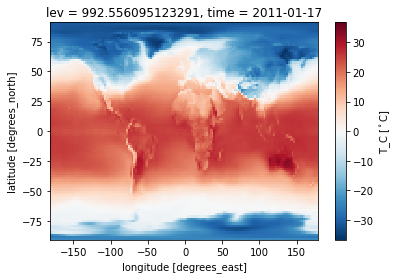

In [16]:
ds_s['T_C'].isel(time=0).plot()

Notice how the labels use both the attribute "standard_name" and "units" from the dataset. 

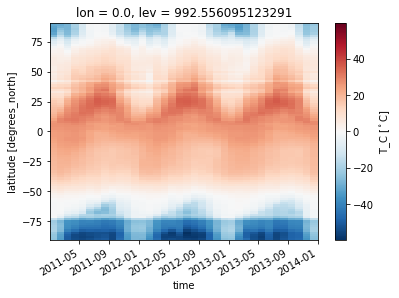

In [17]:
ds['T_C'].sel(lev=1000., lon=0, method='nearest').plot(x='time')

### Slice:

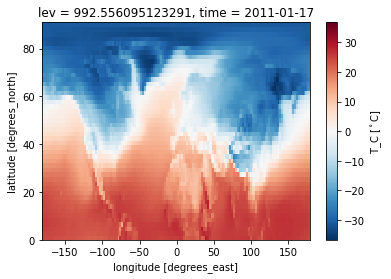

In [18]:
ds_s['T_C'].sel(lat=slice(0,90)).isel(time=0).plot()

### Super quick averaging etc

In [19]:
da_T = ds['T_C']



Mean: 


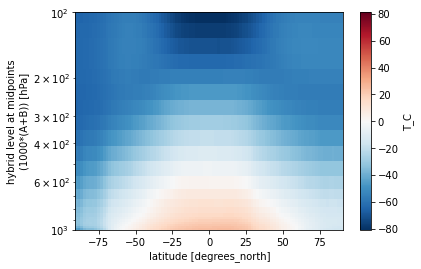

In [20]:
da_T.mean(['time','lon']).plot(ylim=[1000,100], yscale='log')

Standard deviation

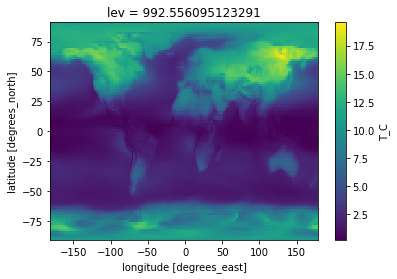

In [21]:
da_T.isel(lev=-1).std(['time']).plot()

Temperature change much stronger over land than ocean...

## Seasonal average

In [22]:
month = (ds['time.month']==7) | (ds['time.month']==8)

In [23]:
ds_sum = ds.where(month).mean('time')

In [24]:
ds_sum

<xarray.Dataset>
Dimensions:  (lat: 96, lev: 32, lon: 144)
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * lev      (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
Data variables:
    hyam     (lev) float64 0.003643 0.007595 0.01436 ... 0.006255 0.001989 0.0
    hybm     (lev) float64 0.0 0.0 0.0 0.0 0.0 ... 0.9251 0.9512 0.9743 0.9926
    P0       float64 1e+05
    N_AER    (lev, lat, lon) float32 0.01799 0.01799 0.01799 ... 13.3 13.3 13.31
    PS       (lat, lon) float32 6.869e+04 6.869e+04 ... 1.012e+05 1.012e+05
    T        (lev, lat, lon) float32 202.9 202.9 202.9 ... 272.2 272.2 272.2
    U        (lev, lat, lon) float32 7.391 7.34 7.276 ... -0.4215 -0.394 -0.3657
    V        (lev, lat, lon) float32 1.004 1.325 1.644 ... 0.6221 0.6399 0.6565
    T_C      (lev, lat, lon) float32 -70.26 -70.26 -70.26 ... -0.9582 -0.9582

In [25]:
ds_season = ds.groupby('time.season').mean()

In [26]:
ds_season

<xarray.Dataset>
Dimensions:  (lat: 96, lev: 32, lon: 144, season: 4)
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
  * lev      (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    hyam     (season, lev) float64 0.003643 0.007595 0.01436 ... 0.001989 0.0
    hybm     (season, lev) float64 0.0 0.0 0.0 0.0 ... 0.9512 0.9743 0.9926
    P0       (season) float64 1e+05 1e+05 1e+05 1e+05
    N_AER    (season, lev, lat, lon) float32 0.006281 0.006281 ... 16.53 16.53
    PS       (season, lat, lon) float32 6.922e+04 6.922e+04 ... 1.011e+05
    T        (season, lev, lat, lon) float32 263.9 263.9 263.9 ... 259.2 259.2
    U        (season, lev, lat, lon) float32 0.6781 0.7017 ... 0.4854 0.5219
    V        (season, lev, lat, lon) float32 -0.5561 -0.526 ... 0.8473 0.8253
    T_C      (season, lev, lat, lon) float32 -9.245 -9.245 ... -13.91 -13.91

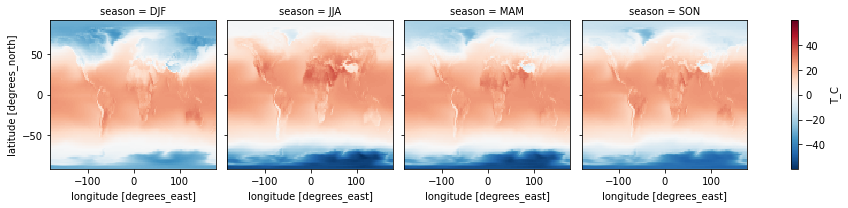

In [27]:
ds_season['T_C'].isel(lev=-1).plot(col='season')

## Controle the plot visuals:

In [28]:
# lets plot the wind fields
_ds = ds_s[['V','U']]
_da = np.sqrt(_ds['V']**2 + _ds['U']**2)

#_da.attrs['long_name'] = 'Wind speed'
#_da.attrs['units'] = 'm/s'

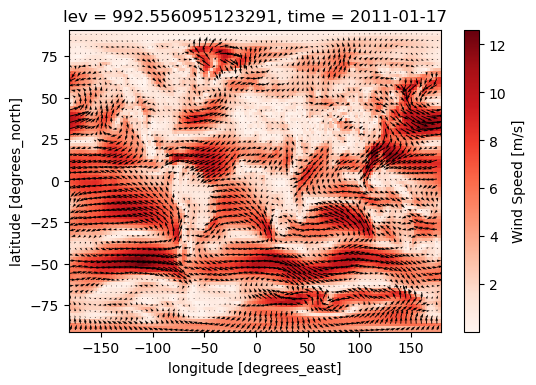

In [29]:
f,ax = plt.subplots(dpi=100)
_dm = _da.isel(time=0)
_dm.plot(cmap = plt.get_cmap('Reds'),ax=ax,
                   cbar_kwargs={'label':'Wind Speed [m/s]'})


_ds = ds_s.isel(time=0,lon =slice(0,None,2), lat=slice(0,None,2))
ax.quiver(_ds['lon'],_ds['lat'],_ds['U'],_ds['V'], scale=300, )

#ax.set_title('Wind strength and pattern')
#ax.set_xlabel('Longitude [$^\circ$E]')

# Plotting with cartopy

In [30]:
import cartopy as cy
import cartopy.crs as ccrs

/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/opt/conda/lib/python3.8/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


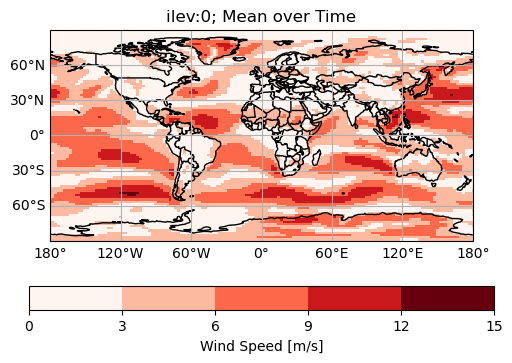

In [31]:
f,ax = plt.subplots(dpi=100,subplot_kw={'projection':ccrs.PlateCarree()})


_dm.plot.pcolormesh(
    cmap = plt.get_cmap('Reds'),ax=ax,
    cbar_kwargs={
        'label':'Wind Speed [m/s]', 
        'orientation':'horizontal',
        
    },
    transform=ccrs.PlateCarree(), 
    x='lon',y='lat',
    levels = 6
)
ax.set_title('ilev:0; Mean over Time')
ax.coastlines()

gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False

ax.add_feature(cy.feature.BORDERS);

# Convert to pandas & do some random fun stuff: 

Maybe we e.g. want to compare with a station, or just use some of the considerable functionalities available from pandas. It's easy to convert back and forth between xarray and pandas:

## Pick out station: 

Lets pick out Tjärnö research station!


In [32]:
lat_tjarno = 58.9
lon_tjarno = 11.1
# pick out surface
ds_surf =ds.isel(lev=-1)
ds_tjarno = ds_surf.sel(lat=lat_tjarno, lon = lon_tjarno, method ='nearest')

### Resample:

In [33]:
df_tjarno = ds_tjarno.to_dataframe()

In [34]:
df_tjarno.head()

,lat,lon,lev,hyam,hybm,P0,N_AER,PS,T,U,V,T_C
time,,,,,,,,,,,,
2011-01-17,59.684211,10.0,992.556095,0.0,0.992556,100000.0,708.058899,96880.921875,269.207245,1.728664,0.475478,-3.942749
2011-02-14,59.684211,10.0,992.556095,0.0,0.992556,100000.0,830.089844,97367.218750,266.607880,-0.424161,1.017061,-6.542114
2011-03-17,59.684211,10.0,992.556095,0.0,0.992556,100000.0,585.032104,97448.093750,271.787231,2.352789,0.320621,-1.362762
2011-04-16,59.684211,10.0,992.556095,0.0,0.992556,100000.0,906.228210,97496.757812,279.498474,1.632975,-0.223941,6.348480
2011-05-17,59.684211,10.0,992.556095,0.0,0.992556,100000.0,872.936096,97293.382812,281.770081,1.449824,1.465539,8.620087


In [35]:
df_yearly = df_tjarno.resample('Y' ).mean()#.plot()

<AxesSubplot:xlabel='time'>

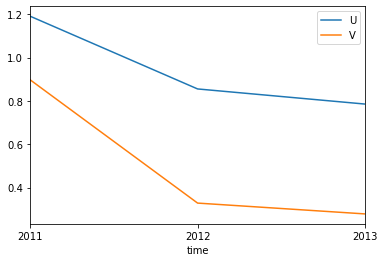

In [36]:
df_yearly[['U','V']].plot()

# Using pandas specific tools:

In [37]:
ds_s['Wind_speed'] = np.sqrt(ds_s['U']**2 + ds_s['V']**2)

In [38]:
df = ds_s.to_dataframe()
df.head()

lev  hyam      hybm        P0      N_AER  \
lat   lon    time                                                          
-90.0 -180.0 2011-01-17  992.556095   0.0  0.992556  100000.0  29.523746   
             2011-02-14  992.556095   0.0  0.992556  100000.0  44.145832   
             2011-03-17  992.556095   0.0  0.992556  100000.0  21.503481   
             2011-04-16  992.556095   0.0  0.992556  100000.0   7.794546   
             2011-05-17  992.556095   0.0  0.992556  100000.0   2.681895   

                                   PS           T         U         V  \
lat   lon    time                                                       
-90.0 -180.0 2011-01-17  69700.375000  249.113022  1.537032  4.258970   
             2011-02-14  69311.914062  239.829407  2.053496  4.899427   
             2011-03-17  68972.187500  223.339386  4.478918  5.187434   
             2011-04-16  68879.500000  219.738770  4.953977  5.242508   
             2011-05-17  68319.210938  218.717712  4.364126  5.071507   

                               T_C  Wind_speed  
lat   lon    time                               
-90.0 -180.0 2011-01-17 -24.036972    4.527835  
             2011-02-14 -33.320587    5.312366  
             2011-03-17 -49.810608    6.853479  
             2011-04-16 -53.411224    7.212889  
             2011-05-17 -54.432281    6.690724

<AxesSubplot:ylabel='Frequency'>

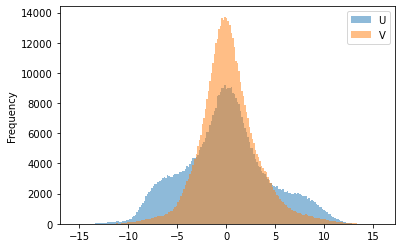

In [39]:
df[['U','V']].plot.hist(alpha=0.5, bins=200)

In [40]:
df_ri = df.reset_index()
df_ri.head()

,lat,lon,time,lev,hyam,hybm,P0,N_AER,PS,T,U,V,T_C,Wind_speed
0,-90.0,-180.0,2011-01-17,992.556095,0.0,0.992556,100000.0,29.523746,69700.375000,249.113022,1.537032,4.258970,-24.036972,4.527835
1,-90.0,-180.0,2011-02-14,992.556095,0.0,0.992556,100000.0,44.145832,69311.914062,239.829407,2.053496,4.899427,-33.320587,5.312366
2,-90.0,-180.0,2011-03-17,992.556095,0.0,0.992556,100000.0,21.503481,68972.187500,223.339386,4.478918,5.187434,-49.810608,6.853479
3,-90.0,-180.0,2011-04-16,992.556095,0.0,0.992556,100000.0,7.794546,68879.500000,219.738770,4.953977,5.242508,-53.411224,7.212889
4,-90.0,-180.0,2011-05-17,992.556095,0.0,0.992556,100000.0,2.681895,68319.210938,218.717712,4.364126,5.071507,-54.432281,6.690724


### Check out the tradewinds (skip in presentation):

<AxesSubplot:ylabel='Frequency'>

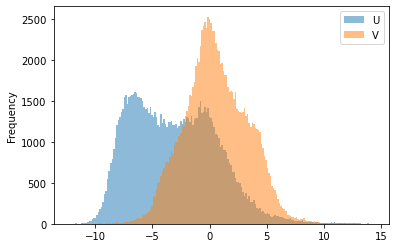

In [41]:

trops = (-20<df_ri['lat']) & (df_ri['lat']<20)
df_ri[['U','V']][trops].plot.hist(alpha=0.5, bins=200)

### lets do something unnecesarily complicated :D 

## qcut, cut

qcut splits the data into quantile ranges

In [42]:


df_ri['wind_speed_cat'] = pd.qcut(df_ri['Wind_speed'], 
                                  q=[0.05,0.17, 0.34,0.66, 0.83,0.95], 
                                  labels=['very low','low','med','high','very high'])

Cut cuts into categories

In [43]:
df_ri['lat_cat'] = pd.cut(df_ri['lat'], [-90,-60,-30,0,30,60,90], 
                          labels=['S polar','S mid','S tropics', 'N tropic', 'N mid','N polar'])

In [44]:
df_ri.groupby('lat_cat').mean()

,lat,lon,lev,hyam,hybm,P0,N_AER,PS,T,U,V,T_C,Wind_speed
lat_cat,,,,,,,,,,,,,
S polar,-74.842105,-1.25,992.556095,0.0,0.992556,100000.0,37.134502,84496.015625,247.586441,-0.925003,1.516052,-25.563553,6.033710
S mid,-45.473684,-1.25,992.556095,0.0,0.992556,100000.0,244.884354,100566.250000,281.765289,5.021757,-0.741656,8.615295,5.929924
S tropics,-15.157895,-1.25,992.556095,0.0,0.992556,100000.0,913.148193,99746.179688,295.955811,-3.451257,1.499390,22.805801,4.714082
N tropic,15.157895,-1.25,992.556095,0.0,0.992556,100000.0,1587.196167,99328.976562,297.289948,-2.338687,-0.537982,24.139965,4.485467
N mid,45.473684,-1.25,992.556095,0.0,0.992556,100000.0,1425.352539,97057.734375,281.913513,1.253338,0.129856,8.763531,2.898627
N polar,75.789474,-1.25,992.556095,0.0,0.992556,100000.0,225.529175,98979.195312,262.373474,0.150430,-0.033408,-10.776512,2.685246


<AxesSubplot:xlabel='lat_cat', ylabel='U'>

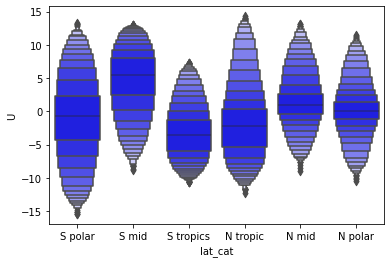

In [45]:
sns.boxenplot(x="lat_cat", y="U",
              color="b",
              scale="linear", data=df_ri)

<AxesSubplot:xlabel='wind_speed_cat', ylabel='N_AER'>

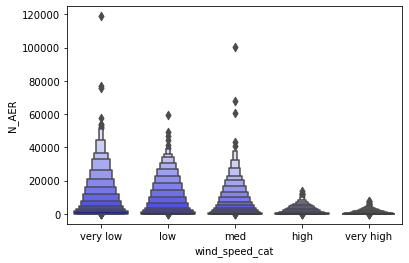

In [46]:
sns.boxenplot(x="wind_speed_cat", y="N_AER",
              color="b",
              scale="linear", data=df_ri,
             )

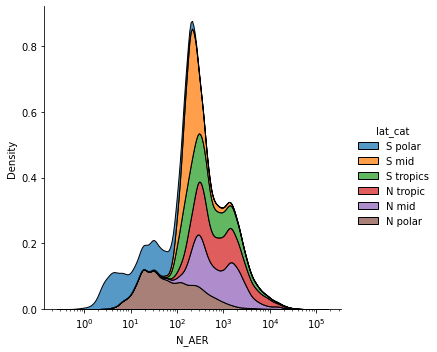

In [47]:
sns.displot(x="N_AER",hue = 'lat_cat',log_scale=True,kind='kde',
            data=df_ri,  multiple="stack")

## Convert back to xarray if we need:

In [48]:
ds_new = df_ri.set_index(['time','lat','lon']).to_xarray()

In [49]:
ds_new

<xarray.Dataset>
Dimensions:         (lat: 96, lon: 144, time: 36)
Coordinates:
  * time            (time) datetime64[ns] 2011-01-17 2011-02-14 ... 2013-12-17
  * lat             (lat) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon             (lon) float64 -180.0 -177.5 -175.0 ... 172.5 175.0 177.5
Data variables: (12/13)
    lev             (time, lat, lon) float64 992.6 992.6 992.6 ... 992.6 992.6
    hyam            (time, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    hybm            (time, lat, lon) float64 0.9926 0.9926 ... 0.9926 0.9926
    P0              (time, lat, lon) float64 1e+05 1e+05 1e+05 ... 1e+05 1e+05
    N_AER           (time, lat, lon) float32 29.52 29.52 29.52 ... 29.87 29.87
    PS              (time, lat, lon) float32 6.97e+04 6.97e+04 ... 1.012e+05
    ...              ...
    U               (time, lat, lon) float32 1.537 1.35 1.161 ... 3.829 3.874
    V               (time, lat, lon) float32 4.259 4.322 4.377 ... 1.122 0.9543
    T_C             (time, lat, lon) float32 -24.04 -24.04 ... -22.78 -22.78
    Wind_speed      (time, lat, lon) float32 4.528 4.528 4.528 ... 3.99 3.99
    wind_speed_cat  (time, lat, lon) object 'med' 'med' 'med' ... 'med' 'med'
    lat_cat         (time, lat, lon) object nan nan nan ... 'N polar' 'N polar'

### Groupby

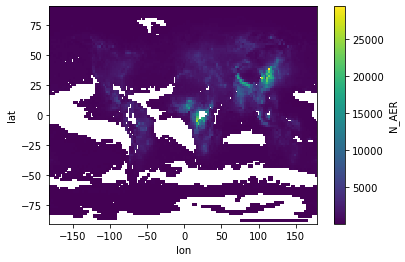

In [50]:
ds_new.where(ds_new['wind_speed_cat']=='low').mean('time')['N_AER'].plot()

In [51]:
ds['wind_speed'] = np.sqrt(ds['U']**2+ ds['V']**2)

In [52]:
ds_new.groupby('wind_speed_cat').mean()

<xarray.Dataset>
Dimensions:         (wind_speed_cat: 5)
Coordinates:
  * wind_speed_cat  (wind_speed_cat) object 'high' 'low' ... 'very low'
Data variables:
    lev             (wind_speed_cat) float64 992.6 992.6 992.6 992.6 992.6
    hyam            (wind_speed_cat) float64 0.0 0.0 0.0 0.0 0.0
    hybm            (wind_speed_cat) float64 0.9926 0.9926 0.9926 0.9926 0.9926
    P0              (wind_speed_cat) float64 1e+05 1e+05 1e+05 1e+05 1e+05
    N_AER           (wind_speed_cat) float32 329.0 1.117e+03 ... 237.5 1.437e+03
    PS              (wind_speed_cat) float32 9.642e+04 9.782e+04 ... 9.712e+04
    T               (wind_speed_cat) float32 279.2 279.3 279.2 273.2 280.1
    U               (wind_speed_cat) float32 -0.7335 0.06986 ... -0.1049 0.02193
    V               (wind_speed_cat) float32 0.4115 0.04852 ... 0.3027 -0.01771
    T_C             (wind_speed_cat) float32 6.061 6.121 6.028 0.01729 6.922
    Wind_speed      (wind_speed_cat) float32 6.476 2.127 3.922 8.538 1.218

<AxesSubplot:ylabel='Frequency'>

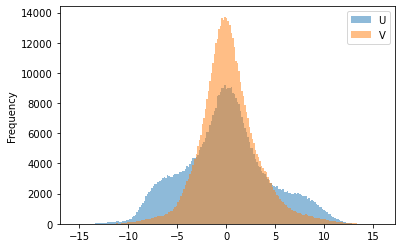

In [53]:
df[['U','V']].plot.hist(alpha=0.5, bins=200)

In [54]:
df_tjarno.head()

,lat,lon,lev,hyam,hybm,P0,N_AER,PS,T,U,V,T_C
time,,,,,,,,,,,,
2011-01-17,59.684211,10.0,992.556095,0.0,0.992556,100000.0,708.058899,96880.921875,269.207245,1.728664,0.475478,-3.942749
2011-02-14,59.684211,10.0,992.556095,0.0,0.992556,100000.0,830.089844,97367.218750,266.607880,-0.424161,1.017061,-6.542114
2011-03-17,59.684211,10.0,992.556095,0.0,0.992556,100000.0,585.032104,97448.093750,271.787231,2.352789,0.320621,-1.362762
2011-04-16,59.684211,10.0,992.556095,0.0,0.992556,100000.0,906.228210,97496.757812,279.498474,1.632975,-0.223941,6.348480
2011-05-17,59.684211,10.0,992.556095,0.0,0.992556,100000.0,872.936096,97293.382812,281.770081,1.449824,1.465539,8.620087
